In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
np.random.seed(10)

time_idx = pd.date_range(start='01/01/2010', end='01/08/2018')
df = pd.DataFrame(index = time_idx)


df['trend'] = range(df.index.size)
df['seasonal'] = np.cos((df.index.dayofyear/365 -0.5)*2*np.pi)
df['noise'] = np.random.randn(df.index.size)

df['data'] = (0.1/365)*df.trend + 0.3*df.seasonal + 0.3*df.noise
df.data = df.data.rolling(7, min_periods=1).mean()

#data['seasonal'] = np.cos(data.index.dayofyear*2*np.pi/365 - np.pi)


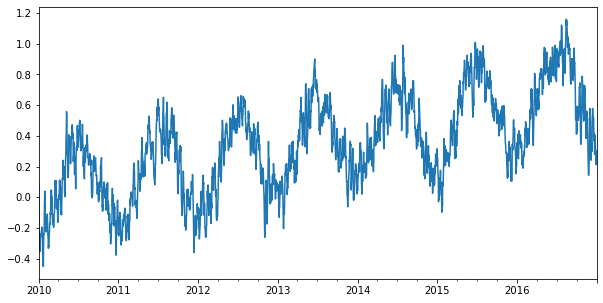

In [3]:
df.data['2010':'2016'].plot(figsize=(10,5))
plt.show()

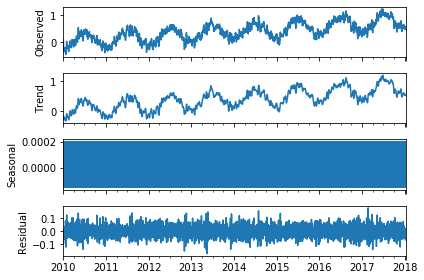

In [4]:
decomposition = seasonal_decompose(df.data, model='aditive')
decomposition.plot();